# List of available Features in Dataset:

1. age: continuous
2. sex: categorical, 2 values {0: female, 1: male}
3. cp (chest pain type): categorical, 4 values{1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
5. chol (serum cholesterol level): continuous (mg/dl)
6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
7. restecg (resting electrocardiography): categorical, 3 values{0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
8. thalach (maximum heart rate achieved): continuous
9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (diagnosis of heart disease): categorical, 5 values {0: less than 50% narrowing in any major vessel, 1-4: more than 50% narrowing in 1-4 vessels}
    
The actual number of feature variables (after converting categorical variables
to dummy ones) is: 
1 (age) + 1 (sex) + 3 (cp) + 1 (restbp) + 1 (chol) + 1 (fbs) + 2 (restecg) + 
1 (thalach) + 1 (exang) + 1 (oldpeak) + 2 (slope) + 1 (ca) + 2 (thal) = 18

The response variable (num) is categorical with 5 values, but we don't have
enough data to predict all the categories. Therefore we'll replace num with:
14. hd (heart disease): categorical, 2 values {0: no, 1: yes}

# Importing important libraries

In [2]:
import numpy as np
import urllib
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.tree import tree 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report , confusion_matrix

from sklearn.metrics import roc_curve 
from sklearn.metrics import auc  
from urllib.request import urlopen    # This is for Getting data from URL
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

#  1. Cleveland Clinic Foundation (cleveland.data)

In [3]:
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
ClevelandHeartDisease = pd.read_csv(urlopen(Cleveland_data_URL),names = features)        #gets Cleveland data
ClevelandHeartDisease.shape

(303, 14)

# 2. Hungarian Institute of Cardiology, Budapest (hungarian.data)

In [4]:
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']

HungarianHeartDisease = pd.read_csv(urlopen(Hungarian_data_URL), names = features)        #gets Cleveland data
HungarianHeartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


# 3. University Hospital, Zurich, Switzerland (switzerland.data)

In [5]:
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
SwitzerlandHeartDisease = pd.read_csv(urlopen(Switzerland_data_URL),names = features)        #gets Cleveland data
SwitzerlandHeartDisease.shape

(123, 14)

# 4. V.A. Medical Center, Long Beach, CA (long-beach-va.data)

In [6]:
Long_Beach_VA_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
LongBeachHeartDisease = pd.read_csv(urlopen(Long_Beach_VA_URL),names = features)        #gets Cleveland data
LongBeachHeartDisease.shape

(200, 14)

As we don't have enough data from single source so we are taking data from 4 sources and we will combine those data into single dataset.

In [7]:
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
V_A_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

np.set_printoptions(threshold=np.nan)           #makes it so that we can see a whole array when we output it
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']

ClevelandHeartDisease = pd.read_csv(urlopen(Cleveland_data_URL), names = features)        #gets Cleveland data
HungarianHeartDisease = pd.read_csv(urlopen(Hungarian_data_URL), names = features)        #gets Hungary data
SwitzerlandHeartDisease = pd.read_csv(urlopen(Switzerland_data_URL), names = features)    #gets Switzerland data
LongBeachHeartDisease = pd.read_csv(urlopen(V_A_URL), names = features)    #gets Switzerland data

temp_data = [ClevelandHeartDisease, HungarianHeartDisease, SwitzerlandHeartDisease,LongBeachHeartDisease]     #combining data from 3 datasets into single dataset 
heartDisease = pd.concat(temp_data)          #combines list into one array
heartDisease.shape

(920, 14)

In [8]:
#Lets count the number of "?" present in our combined data. 
count = 0
for item in heartDisease:
    for i in heartDisease[item]:
        count += (i == '?')
print("Number of ? present in Dataset = " , count)


Number of ? present in Dataset =  1759


We are deleting features 'ca', 'slope', and 'thal'.
And replacing "?" with NAN.

In [9]:
# Number of datapoints before deleting the NAN values

Number_Of_Datapoints_Before = heartDisease.shape[0]
# deleting  'ca', 'slope', 'thal'

del heartDisease['ca']
del heartDisease['slope']
del heartDisease['thal']
heartDisease = heartDisease.replace('?', np.nan)
#print(heartDisease)
#heartDisease

Now we are doing feature Scaling so that all our features are in same range/scale. 
First we are converting the datapoints into float values

In [10]:
#converts everything to floats
for item in heartDisease: 
    heartDisease[item] = pd.to_numeric(heartDisease[item])

#Feature Scaling 

def normalize(heartDisease, toNormalize):
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result

#we are Normalizing the following features.

toNormalize = ['age', 'cp', 'trestbps', 'chol','restecg', 'thalach', 'oldpeak']
heartDisease = normalize(heartDisease, toNormalize)

# Now we are deleting the NAN values from our dataset

heartDisease = heartDisease.dropna()
heartDisease.head()
heartDisease.shape

# Number of datapoints after deleting the NAN values
Number_Of_Datapoints_After = heartDisease.shape[0]

# Number of datapoints deleted
deleted  = Number_Of_Datapoints_Before - Number_Of_Datapoints_After
print("Number of Datapoints deleted : ", deleted)

print("Dataset After Feature Scaling : \n\n")
#heartDisease

Number of Datapoints deleted :  180
Dataset After Feature Scaling : 




As our aim is to predict whether heart disease is present or not so we are converting the classification problem for two classes "0" and "1". "0" for "heart disease is not present and "1" for heart disease is present.

In [11]:
for i in range(1,5):
    heartDisease['heartdisease'] = heartDisease['heartdisease'].replace(i,1)
#heartDisease

As our Classification problem is to predict only "0" and "1" . So lets count the number of datapoints having "Heart  Disease " and Number of Datapoints not having "Heart Disease " .
For this purpose we define a fuction "Class_Counter ".


In [13]:
def Counting_Classes(item,count_not_present, count_present,type_0,type_1,type_2,type_3,type_4):
    i = 0
    n = 0
    Present = 0 
    NotPresent = 0
  
    for item in heartDisease[item]:
        if (item == 1):
            i += 1
            type_1 +=1
            count_present += 1
        elif (item == 0):
            n += 1
            type_0 +=1
            count_not_present +=1
        elif (item == 2):
            type_2 += 2
        elif(item == 3):
            type_3 += 3
        elif(item == 4):
            type_4 += 4
    Present = (i/len(heartDisease)) * 100
    NotPresent = (n/len(heartDisease)) * 100
    print("The percentage of heart disease present is: {0:.4f}%".format(Present)) 
    print("The percentage of heart disease not present is: {0:.4f}%".format(NotPresent))
    return count_not_present  ,count_present,type_0,type_1,type_2,type_3,type_4

count_not_present = 0
count_present = 0
type_0 = 0
type_1 = 0
type_2 = 0
type_3 = 0
type_4 = 0
count_not_present ,count_present,type_0,type_1,type_2,type_3,type_4 = Counting_Classes('heartdisease',count_not_present , count_present,type_0,type_1,type_2,type_3,type_4)
print("Datapoints having Heart Disease : " , count_present)
print("Datapoints not having Heart Disease : " , count_not_present)
#print("type0: ",type_0)
#print("type1: ",type_1)
#print("type2: ",type_2)
#print("type3: ",type_3)
#print("type4: ",type_4)

The percentage of heart disease present is: 51.7568%
The percentage of heart disease not present is: 48.2432%
Datapoints having Heart Disease :  383
Datapoints not having Heart Disease :  357


# Splitting our data into "Testing" and "Training" data
# And then we will start dealing with Different Algorithms

In [14]:
heartDisease  = heartDisease.values
X = heartDisease[:,:10]
Y = heartDisease[:,10]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# 1. Applying Logistic Regression Algorithm

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression()               #creating LogisticRegression object
 
clf.fit(X_train,Y_train)                 #training the model              
Y_pred1 = clf.predict(X_test)
Y_pred1

print("Accuracy score using Logistic Regression Classifier = ",accuracy_score(y_true = Y_test, y_pred = Y_pred1))

print("Training Score = ",clf.score(X_train,Y_train))
print("Testing Score = " ,clf.score(X_test,Y_test))

Accuracy score using Logistic Regression Classifier =  0.7837837837837838
Training Score =  0.809009009009009
Testing Score =  0.7837837837837838


# 2. Applying Decision Tree Algorithm

In [17]:
DTclf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
DTclf.fit(X_train, Y_train)

Y_pred2 = DTclf.predict(X_test)
print("Accuracy score using Decision Tree Classifier = ",accuracy_score(y_true = Y_test, y_pred = Y_pred2))

print("Training Score = ",DTclf.score(X_train,Y_train))
print("Testing Score = " ,DTclf.score(X_test,Y_test))

Accuracy score using Decision Tree Classifier =  0.8
Training Score =  0.809009009009009
Testing Score =  0.8


# 3. Applying KNN Algorithm. 

In [18]:
KNNclf = KNeighborsClassifier(n_neighbors = 5)

KNNclf.fit(X_train ,Y_train)
Y_pred5 = KNNclf.predict(X_test)

In [19]:
print("Accuracy score using KNN Classifier = ",accuracy_score(y_true = Y_test, y_pred = Y_pred5))

print("Training Score = ",KNNclf.score(X_train,Y_train))
print("Testing Score = " ,KNNclf.score(X_test,Y_test))

Accuracy score using KNN Classifier =  0.7891891891891892
Training Score =  0.827027027027027
Testing Score =  0.7891891891891892


# Lets check at what value of K Score is high

In [20]:
X_axis = []
Y_axis = []

print("K Value      Score ")
for i in range(1,25,2):
    clf = KNeighborsClassifier(n_neighbors = i)
    X_axis.append(i)
    clf.fit(X_train ,Y_train)
    score = clf.score(X_test ,Y_pred5)
    Y_axis.append(score.mean())
    print(i,"       ",score.mean())
    
Best_K_Value = max(Y_axis)
print("\nBest Score at optimal value of K = " ,Best_K_Value)

K Value      Score 
1         0.8378378378378378
3         0.9621621621621622
5         1.0
7         0.9513513513513514
9         0.9297297297297298
11         0.8864864864864865
13         0.8864864864864865
15         0.8918918918918919
17         0.8810810810810811
19         0.8810810810810811
21         0.8648648648648649
23         0.8432432432432433

Best Score at optimal value of K =  1.0


# Lets plot a graph of variation in values of K

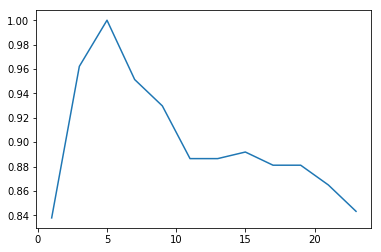

In [21]:
import matplotlib.pyplot as plt
plt.plot(X_axis,Y_axis)
plt.show()

# 4. Applying SVM Algorithm. 

In [22]:
# Using Linear Decision Boundaries
SVMclf = svm.SVC(C =  5,kernel = 'sigmoid')   #linear', 'poly', 'rbf', 'sigmoid'
SVMclf.fit(X_train,Y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
SVMclf.score(X_test,Y_test)

0.7783783783783784

In [24]:
Y_pred6 = SVMclf.predict(X_test)
SVMclf.score(X_train,Y_train)

0.8018018018018018

In [25]:
#Y_pred6 - Y_test

In [26]:
print(classification_report(Y_test ,Y_pred6))
print(confusion_matrix(Y_test ,Y_pred6))

             precision    recall  f1-score   support

        0.0       0.73      0.74      0.74        78
        1.0       0.81      0.80      0.81       107

avg / total       0.78      0.78      0.78       185

[[58 20]
 [21 86]]


In [27]:
print("Accuracy score using SVM  Classifier = ",accuracy_score(y_true = Y_test, y_pred = Y_pred6))

print("Training Score = ",SVMclf.score(X_train,Y_train))
print("Testing Score = " ,SVMclf.score(X_test,Y_pred6))

Accuracy score using SVM  Classifier =  0.7783783783783784
Training Score =  0.8018018018018018
Testing Score =  1.0


# Lets Plot the Decision Boundaries

In [31]:
clf = svm.SVC(C = 5,kernel  = 'poly')
x = heartDisease[: ,0:2]   #Taking the Two Features only
y = heartDisease[:,10]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
clf.fit(x_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
def makegrid(x1,x2,h=0.02):
    x1_min, x1_max = x1.min() -1 ,x1.max() +1
    x2_min, x2_max = x2.min() -1 ,x2.max() +1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min,x2_max,h)
    xx,yy= np.meshgrid(a,b)
    return xx,yy  

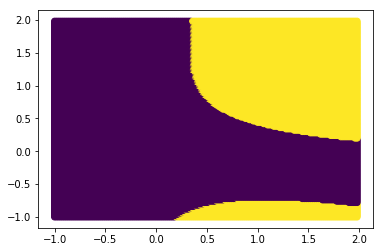

In [33]:
xx , yy = makegrid(x[:,0],x[:,1])
predictions = clf.predict(np.c_[xx.ravel(),yy.ravel()])
plt.scatter(xx.ravel(),yy.ravel(), c= predictions)
plt.show()

In [34]:
# Accuracy when using sigmoid kernel for Decision Boundaries

In [35]:
print("Accuracy score using SVM  Classifier = ",accuracy_score(y_true = Y_test, y_pred = Y_pred6))

print("Training Score = ",SVMclf.score(X_train,Y_train))
print("Testing Score = " ,SVMclf.score(X_test,Y_test))

Accuracy score using SVM  Classifier =  0.7783783783783784
Training Score =  0.8018018018018018
Testing Score =  0.7783783783783784


In [36]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [37]:
pca = PCA()
X_new = pca.fit_transform(X)

# 5. Applying Random Forest Algorithm. 

In [38]:
RFclf = RandomForestClassifier(random_state = 0, criterion='gini',n_estimators = 500,max_features = 5,max_depth = 12)
RFclf.fit(X_train ,Y_train)
Y_pred3 = RFclf.predict(X_test)

print("Accuracy score using Random FOrest Classifier Classifier = ",accuracy_score(y_true = Y_test, y_pred = Y_pred3))

print("Training Score = ",RFclf.score(X_train,Y_train))
print("Testing Score = " ,RFclf.score(X_test,Y_test))

Accuracy score using Random FOrest Classifier Classifier =  0.8108108108108109
Training Score =  1.0
Testing Score =  0.8108108108108109


# Lets check what imporatnce of each feature is in our Random Forest Classifier

In [39]:
importancesRF = RFclf.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]
indicesRF

array([2, 7, 4, 8, 9, 0, 3, 1, 6, 5], dtype=int64)

In [41]:
namesInd = features[:12]
print("Feature ranking:")

for f in range(10):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, namesInd[indicesRF[i]], importancesRF[indicesRF[f]]))


Feature ranking:
1. The feature 'cp' has a Gini Importance of 0.188226
2. The feature 'thalach' has a Gini Importance of 0.142960
3. The feature 'chol' has a Gini Importance of 0.129675
4. The feature 'exang' has a Gini Importance of 0.116763
5. The feature 'oldpeak' has a Gini Importance of 0.115342
6. The feature 'age' has a Gini Importance of 0.114252
7. The feature 'trestbps' has a Gini Importance of 0.100512
8. The feature 'sex' has a Gini Importance of 0.043155
9. The feature 'restecg' has a Gini Importance of 0.029168
10. The feature 'fbs' has a Gini Importance of 0.019947


# Crosstab of the Random Forest. 

In [42]:
predictions_RF = RFclf.predict(X_test)
print(pd.crosstab(predictions_RF, Y_pred3, 
                  rownames=['Predicted_Values'], 
                  colnames=['Actual_Values']))

accuracy_RF = RFclf.score(X_train, Y_train)

print("Mean Accuracy on the Training Data : {} %".format(accuracy_RF * 100))

Actual_Values     0.0  1.0
Predicted_Values          
0.0                77    0
1.0                 0  108
Mean Accuracy on the Training Data : 100.0 %


# 6. Applying Naive Bayes Algorithm. 

In [43]:
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
NBclf.fit(X_train , Y_train)
Y_pred4 = NBclf.predict(X_test)
print(classification_report(Y_test ,Y_pred4))
print(confusion_matrix(Y_test ,Y_pred4))

             precision    recall  f1-score   support

        0.0       0.80      0.71      0.75        78
        1.0       0.80      0.87      0.83       107

avg / total       0.80      0.80      0.80       185

[[55 23]
 [14 93]]


In [44]:
print("Accuracy score using Naive Bayes Classifier Classifier = ",accuracy_score(y_true = Y_test, y_pred = Y_pred3))

print("Training Score = ",NBclf.score(X_train,Y_train))
print("Testing Score = " ,NBclf.score(X_test,Y_test))

Accuracy score using Naive Bayes Classifier Classifier =  0.8108108108108109
Training Score =  0.8036036036036036
Testing Score =  0.8


# Naive Bayes

In [52]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

class Prediction:
    def __init__(self):
        self.X = []
        self.Y = []
# Function "Cleaning_Data()" For cleaning the data
    def Cleaning_Data(self,dataset):
        featurenames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']

        df = pd.read_csv(dataset, names=featurenames)
        del df['ca']
        del df['slope']
        del df['thal']
        featurenames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','heartdisease']
        df = df.replace('[?]', np.nan, regex=True)
        df = pd.DataFrame(Imputer(missing_values='NaN', strategy='mean', axis=0).fit_transform(df), columns=featurenames)
        df = df.astype(float)
        return df
    
# Function "Split_Dataset()" For splitting data into input and output
    def Splitting_Dataset(self, df):
        self.Y = df['heartdisease'].apply(lambda x: 1 if x > 0 else 0)
        self.X = df.drop('heartdisease', axis=1)
    
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=0.33, random_state=0)

# function Create_Pipeline() 
    def Create_Pipeline(self):
        estimators_list = []
        estimators_list.append(('standardize', StandardScaler()))
        estimators_list.append(('bayes', GaussianNB()))
        model = Pipeline(estimators_list)
        return model

    def Cross_Validate(self, clf, cv=5):
        scores = cross_val_score(clf, self.X_test, self.Y_test, cv=cv, scoring='f1')
        score = scores.mean()
        Y_pred4 = clf.predict(self.X_test)
        print("Cross Validation Scores mean: ",score)
        print("Accuracy score using Naive Bayes Classifier = ",accuracy_score(y_true = self.Y_test, y_pred = Y_pred4))

        print("Naive Nayes Testing Score = " ,clf.score(self.X_test,self.Y_test))
        

    def Training_Score(self, clf):
        clf.fit(self.X_train, self.Y_train)
        fit_score = clf.score(self.X_train, self.Y_train)
        print("Naive Bayes Training Score = " ,clf.score(self.X_train,self.Y_train))

    def ReturnPredictionValue(self, clf, sample):
        y = clf.predict([sample])
        return y[0]

    def Reading_Data(self, sample, dataset_path):
        #print("dataset: ", dataset_path[0],dataset_path[1],dataset_path[2],dataset_path[3])
        data1 = self.Cleaning_Data(dataset_path[0])
        data2 = self.Cleaning_Data(dataset_path[1])
        data3 = self.Cleaning_Data(dataset_path[2])
        data4 = self.Cleaning_Data(dataset_path[3])
        data = [data1,data2,data3,data4]
        data = pd.concat(data)
        self.Splitting_Dataset(data)
        self.model = self.Create_Pipeline()
        self.Training_Score(self.model)
        self.Cross_Validate(self.model, 13)
        return self.ReturnPredictionValue(self.model, sample)

In [53]:
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
V_A_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
datatemp = [Cleveland_data_URL, Hungarian_data_URL, Switzerland_data_URL ,V_A_URL]     #combining data from 3 datasets into single dataset 

if __name__ == '__main__':
    sample = [41.0, 0.0, 2.0, 130.0, 204.0, 0.0, 2.0, 172.0, 0.0, 1.4]
    p = Prediction()
    print("Predicted value for the given Sample input : {}".format(p.Reading_Data(sample,datatemp)))
    print("Actual value for the given Sample input : 0 ")

Naive Bayes Training Score =  0.8262295081967214
Cross Validation Scores mean:  0.8619405789305455
Accuracy score using Naive Bayes Classifier =  0.8704318936877077
Naive Nayes Testing Score =  0.8704318936877077
Predicted value for the given Sample input : 0
Actual value for the given Sample input : 0 


# Applying PCA (Principle of Component Analysis) 

In [54]:
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
V_A_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
ClevelandHeartDisease = pd.read_csv(urlopen(Cleveland_data_URL), names = names)        #gets Cleveland data
HungarianHeartDisease = pd.read_csv(urlopen(Hungarian_data_URL), names = names)        #gets Hungary data
SwitzerlandHeartDisease = pd.read_csv(urlopen(Switzerland_data_URL), names = names)    #gets Switzerland data
LongBeachHeartDisease = pd.read_csv(urlopen(V_A_URL), names = names) 
datatemp = [ClevelandHeartDisease, HungarianHeartDisease, SwitzerlandHeartDisease,LongBeachHeartDisease]     #combining data from 3 datasets into single dataset 
heartDisease = pd.concat(datatemp)          #combines list into one array
del heartDisease['ca']
del heartDisease['slope']
del heartDisease['thal']

In [55]:
heartDisease = heartDisease.replace("?",np.nan)

In [56]:
heartDisease = heartDisease.dropna()

In [57]:
#converts everything to floats
for item in heartDisease: 
    heartDisease[item] = pd.to_numeric(heartDisease[item])

#Feature Scaling 

def normalize(heartDisease, toNormalize):
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result

#we are Normalizing the following features.

toNormalize = ['age', 'cp', 'trestbps', 'chol','restecg', 'thalach', 'oldpeak']
heartDisease = normalize(heartDisease, toNormalize)


In [58]:
Y = heartDisease['heartdisease'].apply(lambda x: 1 if x > 0 else 0)
X = heartDisease.drop('heartdisease', axis=1)
    

In [59]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [60]:
pca = PCA()

In [61]:
X = pca.fit_transform(X)

In [62]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(X,Y,random_state = 0 ,test_size = 0.33)

In [63]:
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
NBclf.fit(x_train , y_train)
y_pred4 = NBclf.predict(x_test)
print(classification_report(y_test ,y_pred4))
print(confusion_matrix(y_test ,y_pred4))

             precision    recall  f1-score   support

        0.0       0.70      0.56      0.63       108
        1.0       0.70      0.81      0.75       137

avg / total       0.70      0.70      0.70       245

[[ 61  47]
 [ 26 111]]


In [64]:
print("Accuracy score using Naive Bayes Classifier = ",accuracy_score(y_true = y_test, y_pred = y_pred4))

print("Training Score = ",NBclf.score(x_train,y_train))
print("Testing Score = " ,NBclf.score(x_test,y_test))

Accuracy score using Naive Bayes Classifier =  0.7020408163265306
Training Score =  0.6686868686868687
Testing Score =  0.7020408163265306


# Accuracy of Each Algorithms

In [65]:
accuracy1 = []
accuracy2 = []

# list of algorithms names
classifiers = ['Logistic Regression', 'Decision Trees','KNN', 'SVM','Random Forests','Naive Bayes' ]

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors = 7), DecisionTreeClassifier(max_leaf_nodes=11, random_state=0), LogisticRegression(), 
        GaussianNB(), svm.SVC(C=5, kernel='linear'), RandomForestClassifier(random_state = 0, criterion='gini',n_estimators = 500,max_features = 5,max_depth = 10)]

for i in models:
    model = i
    model.fit(x_train_pca, y_train_pca)
    y_predd_pca = model.predict(x_test_pca)
    score = model.score(x_test_pca, y_test_pca)
    score_train = model.score(x_train_pca, y_train_pca)
    accuracy1.append(score)
    accuracy2.append(score_train)



In [66]:
# printing the Algorithms and corresponding Accuracy
summary = pd.DataFrame({'test_accuracy':accuracy1,'train_accuracy':accuracy2}, index=classifiers)       
summary

,test_accuracy,train_accuracy
Logistic Regression,0.822511,0.854390
Decision Trees,0.852814,0.882227
KNN,0.839827,0.809422
SVM,0.831169,0.813704
Random Forests,0.835498,0.805139
Naive Bayes,0.900433,1.000000


# Dealing with manually created data wich contains 41 types of diseases

In [67]:
# Data for training the models
data = pd.read_csv("Manual-Data/Training.csv")

In [68]:
print("Shape of the the data : ",data.shape)
print("Features present in dataset : ",data.columns)
print("Number of features present : ",len(data.columns))

Shape of the the data :  (4920, 133)
Features present in dataset :  Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)
Number of features present :  133


In [69]:
print("Number of diseases available in the dataset : ",len(data['prognosis'].unique()))

Number of diseases available in the dataset :  41


In [70]:
df = pd.DataFrame(data)

In [71]:
print(df.shape)
df.head()

(4920, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [72]:
columns = df.columns
columns = columns[:-1]
print(columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)


In [73]:
X = df[columns]
Y = df['prognosis']

# Splitting Data into training and testing data

In [74]:
x_train_man,x_test_man,y_train_man,y_test_man = train_test_split(X,Y,random_state = 0 ,test_size = 0.33)

# Training Multinomial Naive Bayes Classifier

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB

In [76]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train_man, y_train_man)

In [77]:
# Data for testing the trained Models
#test_data = pd.read_csv("Manual-Data/Testing.csv")

In [78]:
#testx = test_data[columns]
#testy = test_data['prognosis']

In [79]:
y_pred_mnb = mnb.predict(x_test_man)
print(classification_report(y_test_man ,y_pred_mnb))
#print(confusion_matrix(testy ,y_pred_mnb))
mnb.score(x_test_man, y_test_man)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        35
                                   AIDS       1.00      1.00      1.00        34
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        37
                                Allergy       1.00      1.00      1.00        39
                              Arthritis       1.00      1.00      1.00        40
                       Bronchial Asthma       1.00      1.00      1.00        44
                   Cervical spondylosis       1.00      1.00      1.00        47
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        37
                            Common Cold       1.00      1.00      1.00        44
                           

1.0

# Training a Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [81]:
print ("DecisionTree")
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt.fit(x_train_man,y_train_man)
print ("Acurracy: ", clf_dt.score(x_test_man,y_test_man))
print("Training Score = ",clf_dt.score(x_train_man,y_train_man))
print("Testing Score = " ,clf_dt.score(x_test_man,y_test_man))

DecisionTree
Acurracy:  1.0
Training Score =  1.0
Testing Score =  1.0


In [82]:
#using  raondom forest
clfRF = RandomForestClassifier(random_state = 0, criterion='gini',n_estimators = 500,max_features = 5,max_depth = 12)
clfRF.fit(x_train_man ,y_train_man)
Y_pred_RF_man = clfRF.predict(x_test_man)

print("Accuracy score using Random Forest Classifier = ",accuracy_score(y_true = y_test_man, y_pred = Y_pred_RF_man))

print("Training Score = ",clfRF.score(x_train_man,y_train_man))
print("Testing Score = " ,clfRF.score(x_test_man,y_test_man))

Accuracy score using Random Forest Classifier =  1.0
Training Score =  1.0
Testing Score =  1.0


# Training a KNN Classifier

In [83]:
from sklearn.svm import SVC
clfKNN = KNeighborsClassifier(n_neighbors = 9)

clfKNN.fit(x_train_man ,y_train_man)
Y_pred_KNN = clfKNN.predict(x_test_man)

print("Accuracy score using KNN Classifier = ",accuracy_score(y_true = y_test_man, y_pred = Y_pred_KNN))

print("Training Score = ",clfKNN.score(x_train_man,y_train_man))
print("Testing Score = " ,clfKNN.score(x_test_man,y_test_man))

Accuracy score using KNN Classifier =  1.0
Training Score =  1.0
Testing Score =  1.0


K Value      Score 
1         1.0
3         1.0
5         1.0
7         1.0
9         1.0
11         1.0
13         1.0

Best Score at optimal value of K =  1.0


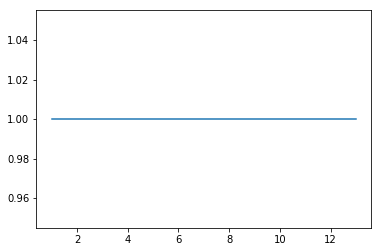

In [84]:
X_axis = []
Y_axis = []

print("K Value      Score ")
for i in range(1,15,2):
    clf = KNeighborsClassifier(n_neighbors = i)
    X_axis.append(i)
    score = cross_val_score(clf,x_test_man ,Y_pred_KNN)
    Y_axis.append(score.mean())
    print(i,"       ",score.mean())
    
Best_K_Value = max(Y_axis)
print("\nBest Score at optimal value of K = " ,Best_K_Value)

import matplotlib.pyplot as plt
plt.plot(X_axis,Y_axis)
plt.show()

In [85]:
accuracy3 = []
accuracy4 = []

# list of algorithms names
classifiers = ['SVM','Decision Trees','KNN','Naive Bayes' ]

# list of algorithms with parameters
models_man =  [SVC(C =  5,kernel = 'sigmoid') ,DecisionTreeClassifier(random_state = 42),KNeighborsClassifier(n_neighbors = 9),GaussianNB()]

for i in models_man:
    model_man = i
    model_man.fit(x_train_man, y_train_man)
    y_predd_man = model_man.predict(x_test_man)
    score_test = model_man.score(x_test_man, y_test_man)
    score_train = model_man.score(x_train_man, y_train_man)
    accuracy3.append(score_test)
    accuracy4.append(score_train)



In [86]:
# printing the Algorithms and corresponding Accuracy
summary = pd.DataFrame({'test_accuracy':accuracy3,'train_accuracy':accuracy4}, index=classifiers)       
summary

,test_accuracy,train_accuracy
SVM,1.0,1.0
Decision Trees,1.0,1.0
KNN,1.0,1.0
Naive Bayes,1.0,1.0
